<AxesSubplot:xlabel='Population', ylabel='Profit'>

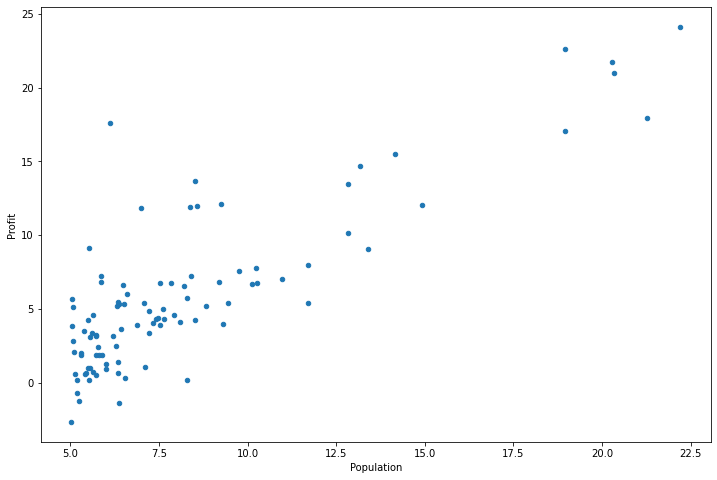

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = 'exedata1.txt'
data = pd.read_csv(path,header=None,names=['Population','Profit'])
# 初试数据绘图scatter
data.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))

In [41]:
# 让我们在训练集中添加一列1,因为梯度下降时θ0计算所乘的X0为1
data.insert(0,'Ones',1) # 在第0列加一列，名称为Ones，值全为1
# 处理X y
cols = data.shape[1] # shape[0]返回行数 shape[1]返回列数
# iloc函数以二维矩阵的位置坐标作为参数
X = data.iloc[:,0:cols-1] # 所有行，去掉最后一列元素 (左闭右开规则) 写这么复杂可能是因为有时候X有多列吧
y = data.iloc[:,cols-1:cols] # 所有行，最后一列
# 注意data.iloc[:,-1]返回的是Series 而上文返回的是DataFrame
# np.matrix将ndarray转换为np.matrix类型
X = np.matrix(X.values) # X是DataFram类型  X.values是ndarray类型
y = np.matrix(y.values)
# 初始化
theta = np.matrix([0,0]) # theta初始化为1*2的矩阵[0,0]
alpha = 0.01
iters = 1000 

In [42]:
# 计算代价(向量化的方法)
def computeCost(X,y,theta):
    inner = np.power(((X * theta.T) - y),2) # .T方法用于对矩阵转置 np.power
    # 这个inner是矩阵吗，下面的sum是矩阵求和吗
    return np.sum(inner) / (2*len(X)) 

In [43]:
def gradientDescent(X,y,theta,alpha,iters): # iters迭代次数
    cost = np.zeros(iters)
    # X第一列全为1 第二列为Population
    temp = np.matrix(np.zeros(theta.shape)) #和theta同形 全为0
    # theta是np.matrix; ravel(散开的)函数将矩阵展开为一行; 然后取其长度(列数)
    parameters = int(theta.ravel().shape[1]) # parameters是theta元素个数吧；直接theta.size不香吗
    for i in range(iters): # 不断迭代
        error = X * theta.T - y
        for j in range(parameters): # 本层循环用于梯度更新所有的theta
            # 由于theta0的更新时*1，theta1*x1
            term = np.multiply(error,X[:,j]) # X[:,j]对应的是Xj
            # error 是一个列向量，X[:,j]是一个列向量。好好体会上一行
            temp[0,j] = theta[0,j] - alpha/(len(X)) * np.sum(term) 
            # 此处为何设置临时变量temp? 答：所有的theta必须同时更新！妙啊
        theta = temp
        cost[i] = computeCost(X,y,theta)
        
    return theta,cost

In [45]:
# 更新后
theta,cost = gradientDescent(X,y,theta,alpha,iters)

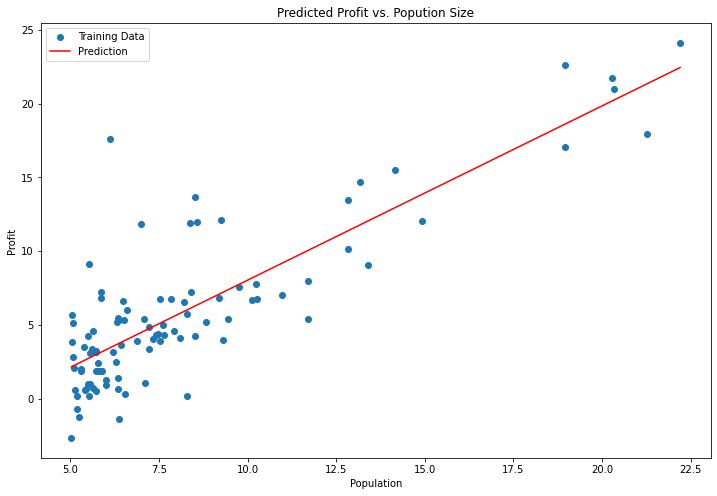

In [71]:
# 绘制样本数据及拟合直线
x = np.linspace(data.Population.min(),data.Population.max(),100) # 自造一串x来表示直线
h = theta[0,0] + theta[0,1] * x
plt.figure(figsize=(12,8))
plt.scatter(np.array(X[:,-1]),np.array(y[:,-1]),label='Training Data')
plt.plot(x,h,'r',label='Prediction')
plt.xlabel('Population'),plt.ylabel('Profit'),plt.title('Predicted Profit vs. Popution Size')
plt.legend()
plt.show()

(Text(0.5, 0, 'itertions'), Text(0, 0.5, 'Cost'))

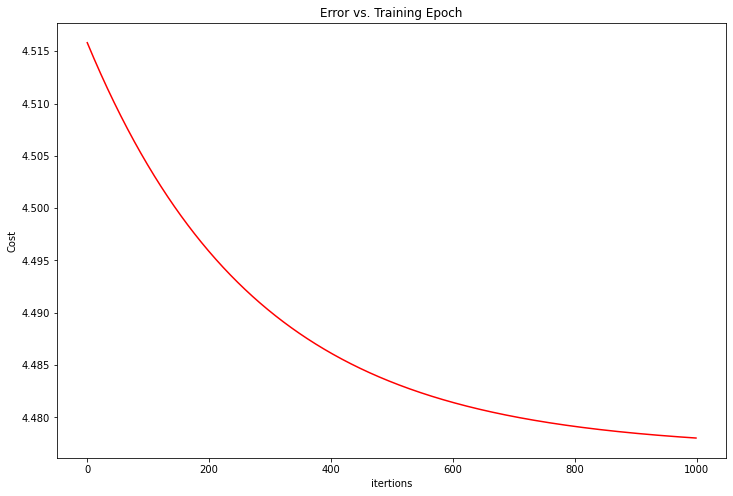

In [77]:
# 绘制梯度下降时的cost变化值
plt.figure(figsize=(12,8))
plt.plot(np.arange(iters),cost,'r')
plt.title('Error vs. Training Epoch')
plt.xlabel('itertions'), plt.ylabel('Cost')